# The Very Basics of Musical Instruments Classification using Machine Learning
 
 
<p align="right">
<img src="./img/knn.png" width="500px" alt="Intro" align="left" >
</p>

<br>

<p align="left">
<img src="./img/businesscard.jpg" width="300px" alt="Business Card" align="left" >
</p>
<br>



In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/p_IU6uRqHvE" 
frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture"></iframe>

## Imports

In [3]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Auxiliary Functions

In [4]:
# Function to Display a Website
def show_web(url):
    html_code='<center><iframe src="%s" width="800" height="600" frameborder="0" marginheight="0" marginwidth="0">Loading...</iframe></center>' \
		% (url)
    display(HTML(html_code))

## Dataset

In [5]:
# Dataset Information
show_web("https://www.philharmonia.co.uk/explore/sound_samples")

## Get filenames

In [6]:
# Get files in data path
path='./audio/london_phill_dataset_multi/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.mp3'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 600 audio files in ./audio/london_phill_dataset_multi/


## Prepare labels from filenames

In [7]:
# Get Labels
labels =[]
classes=['flute','sax','oboe', 'cello','trumpet','viola']
color_dict={'cello':'blue', 'flute':'red', 'oboe':'green', 'trumpet':'black', 'sax':'magenta', 'viola':'yellow'}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [8]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

6 classes: cello, flute, oboe, sax, trumpet, viola


## Parameters for MFCC

In [9]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

In [10]:
show_web('https://musicinformationretrieval.com/mfcc.html')

## Function to Calculate Audio Features: MFCC

In [11]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [12]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_025_mezzo-piano_arco-normal.mp3
get 2 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_forte_arco-normal.mp3
get 3 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_025_fortissimo_arco-normal.mp3
get 4 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_025_forte_arco-normal.mp3
get 5 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_025_fortissimo_arco-normal.mp3
get 6 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_05_pianissimo_arco-normal.mp3
get 7 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_1_mezzo-piano_arco-normal.mp3
get 8 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_1_mezzo-piano_arco-normal.mp3
get 9 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs2_025_pianissimo_arco-normal.mp3
get 10 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_05_fortissimo_arco-normal.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 11 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_1_pianissimo_arco-normal.mp3
get 12 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_025_mezzo-piano_arco-normal.mp3
get 13 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_025_pianissimo_arco-normal.mp3
get 14 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_025_pianissimo_arco-normal.mp3
get 15 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_1_forte_arco-normal.mp3
get 16 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_pianissimo_arco-normal.mp3
get 17 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_15_pianissimo_arco-normal.mp3
get 18 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_15_piano_arco-normal.mp3
get 19 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_15_mezzo-piano_arco-normal.mp3
get 20 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_mezzo-piano_arco-normal.mp3
get 21 of 600 = ./audio/london_phill_datase

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 22 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_05_pianissimo_arco-normal.mp3
get 23 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_025_mezzo-forte_arco-col-legno-battuto.mp3
get 24 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_05_pianissimo_arco-normal.mp3
get 25 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_15_forte_arco-normal.mp3
get 26 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_05_fortissimo_arco-normal.mp3
get 27 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_05_fortissimo_arco-normal.mp3
get 28 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_05_forte_arco-normal.mp3
get 29 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_fortissimo_arco-normal.mp3
get 30 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_15_fortissimo_arco-normal.mp3
get 31 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_05_forte_arco-normal.mp3
get 32 of 600 = ./audio/london_phill_da

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 34 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_15_fortissimo_arco-normal.mp3
get 35 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_025_fortissimo_arco-normal.mp3
get 36 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_025_fortissimo_arco-normal.mp3
get 37 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_025_fortissimo_arco-normal.mp3
get 38 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_15_forte_arco-normal.mp3
get 39 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_025_fortissimo_arco-normal.mp3
get 40 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_1_pianissimo_arco-normal.mp3
get 41 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_025_forte_arco-normal.mp3
get 42 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_025_mezzo-forte_arco-col-legno-battuto.mp3
get 43 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_025_pianissimo_arco-normal.mp3
get 44 of 600 = ./audio/lo

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 46 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_05_forte_arco-normal.mp3
get 47 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_1_fortissimo_arco-normal.mp3
get 48 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_05_pianissimo_arco-normal.mp3
get 49 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_025_pianissimo_arco-normal.mp3
get 50 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_1_forte_arco-normal.mp3
get 51 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_15_pianissimo_arco-normal.mp3
get 52 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_025_pianissimo_arco-normal.mp3
get 53 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_025_pianissimo_arco-normal.mp3
get 54 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_1_fortissimo_arco-normal.mp3
get 55 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_15_fortissimo_arco-normal.mp3
get 56 of 600 = ./audio/london_phill_dataset_m

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 59 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_15_mezzo-piano_arco-normal.mp3
get 60 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_025_mezzo-piano_arco-normal.mp3
get 61 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_025_forte_arco-normal.mp3
get 62 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_05_pianissimo_arco-normal.mp3
get 63 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_025_mezzo-piano_arco-normal.mp3
get 64 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_1_mezzo-piano_arco-normal.mp3
get 65 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_1_forte_arco-normal.mp3
get 66 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_1_pianissimo_arco-normal.mp3
get 67 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_15_pianissimo_arco-normal.mp3
get 68 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_15_pianissimo_arco-normal.mp3
get 69 of 600 = ./audio/london_phill_da

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 71 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 72 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_05_forte_arco-normal.mp3
get 73 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_05_mezzo-piano_arco-normal.mp3
get 74 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_1_mezzo-piano_arco-minor-trill.mp3
get 75 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_05_forte_arco-normal.mp3
get 76 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_1_mezzo-forte_arco-harmonic.mp3
get 77 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_1_fortissimo_arco-normal.mp3
get 78 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_1_pianissimo_arco-normal.mp3
get 79 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_mezzo-forte_arco-harmonic.mp3
get 80 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_1_forte_arco-normal.mp3
get 81 of 600 = ./audio/london

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 83 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_025_mezzo-piano_arco-normal.mp3
get 84 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_025_forte_arco-normal.mp3
get 85 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A3_1_fortissimo_arco-normal.mp3
get 86 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_025_forte_arco-normal.mp3
get 87 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs3_05_mezzo-piano_arco-normal.mp3
get 88 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 89 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_05_mezzo-piano_arco-normal.mp3
get 90 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs5_05_mezzo-piano_arco-normal.mp3
get 91 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_05_mezzo-piano_arco-normal.mp3
get 92 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_mezzo-piano_molto-vibrato.mp3
get 93 of 600 = ./audio/l

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 96 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A2_1_forte_arco-normal.mp3
get 97 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_15_forte_arco-normal.mp3
get 98 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_1_mezzo-piano_arco-minor-trill.mp3
get 99 of 600 = ./audio/london_phill_dataset_multi/cello/cello_A4_15_forte_arco-normal.mp3
get 100 of 600 = ./audio/london_phill_dataset_multi/cello/cello_Gs4_025_forte_arco-normal.mp3
get 101 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_025_forte_normal.mp3
get 102 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_15_pianissimo_normal.mp3
get 103 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_15_piano_normal.mp3
get 104 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_025_fortissimo_normal.mp3
get 105 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_mezzo-forte_normal.mp3
get 106 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 108 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_15_pianissimo_normal.mp3
get 109 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_1_piano_normal.mp3
get 110 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_05_piano_normal.mp3
get 111 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_025_mezzo-forte_normal.mp3
get 112 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds5_1_forte_minor-trill.mp3
get 113 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_mezzo-forte_slap-tongue.mp3
get 114 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_1_forte_normal.mp3
get 115 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_05_piano_normal.mp3
get 116 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_15_fortissimo_normal.mp3
get 117 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_15_fortissimo_normal.mp3
get 118 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 120 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_05_piano_normal.mp3
get 121 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_1_piano_normal.mp3
get 122 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_025_forte_normal.mp3
get 123 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_025_mezzo-forte_normal.mp3
get 124 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_05_fortissimo_normal.mp3
get 125 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_15_fortissimo_normal.mp3
get 126 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_025_fortissimo_normal.mp3
get 127 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_1_fortissimo_normal.mp3
get 128 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_025_pianissimo_normal.mp3
get 129 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_15_forte_normal.mp3
get 130 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_15_fo

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 132 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_05_fortissimo_normal.mp3
get 133 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_pianissimo_subtone.mp3
get 134 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_025_mezzo-piano_normal.mp3
get 135 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_1_forte_normal.mp3
get 136 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_025_fortissimo_normal.mp3
get 137 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_05_forte_normal.mp3
get 138 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_fortissimo_normal.mp3
get 139 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_piano_normal.mp3
get 140 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_1_piano_normal.mp3
get 141 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_05_fortissimo_normal.mp3
get 142 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_1

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 146 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_1_forte_normal.mp3
get 147 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_025_piano_normal.mp3
get 148 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_15_pianissimo_normal.mp3
get 149 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_05_pianissimo_normal.mp3
get 150 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_1_pianissimo_normal.mp3
get 151 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_1_fortissimo_normal.mp3
get 152 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_1_pianissimo_normal.mp3
get 153 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_15_forte_normal.mp3
get 154 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_025_mezzo-piano_normal.mp3
get 155 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_05_pianissimo_normal.mp3
get 156 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_15_

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 158 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_025_forte_normal.mp3
get 159 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_1_pianissimo_normal.mp3
get 160 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_1_fortissimo_normal.mp3
get 161 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_15_fortissimo_normal.mp3
get 162 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_05_fortissimo_normal.mp3
get 163 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_15_forte_normal.mp3
get 164 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_05_forte_normal.mp3
get 165 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_025_forte_normal.mp3
get 166 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_1_fortissimo_normal.mp3
get 167 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_05_fortissimo_normal.mp3
get 168 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_05_fo

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 170 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_025_forte_normal.mp3
get 171 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_05_forte_normal.mp3
get 172 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_05_pianissimo_normal.mp3
get 173 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_025_fortissimo_normal.mp3
get 174 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_025_pianissimo_normal.mp3
get 175 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_025_piano_normal.mp3
get 176 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_1_piano_normal.mp3
get 177 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A5_05_pianissimo_normal.mp3
get 178 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_pianissimo_normal.mp3
get 179 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_1_forte_normal.mp3
get 180 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_15_pi

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 184 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_1_pianissimo_normal.mp3
get 185 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_05_piano_normal.mp3
get 186 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_025_pianissimo_normal.mp3
get 187 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A4_05_pianissimo_normal.mp3
get 188 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs3_15_pianissimo_normal.mp3
get 189 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_05_mezzo-piano_normal.mp3
get 190 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_05_piano_normal.mp3
get 191 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_15_fortissimo_normal.mp3
get 192 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_025_piano_normal.mp3
get 193 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_05_piano_normal.mp3
get 194 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs5_02

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 198 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_A3_15_fortissimo_normal.mp3
get 199 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_1_piano_normal.mp3
get 200 of 600 = ./audio/london_phill_dataset_multi/sax/saxophone_Gs4_05_mezzo-forte_normal.mp3
get 201 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_15_fortissimo_normal.mp3
get 202 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_05_mezzo-forte_normal.mp3
get 203 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_1_fortissimo_normal.mp3
get 204 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_15_forte_normal.mp3
get 205 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_1_forte_normal.mp3
get 206 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_1_forte_normal.mp3
get 207 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_1_fortissimo_normal.mp3
get 208 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_15_forte_normal.mp3
get 209 of 600 = ./

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 211 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_05_mezzo-forte_normal.mp3
get 212 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_15_forte_normal.mp3
get 213 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_15_forte_normal.mp3
get 214 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_15_forte_normal.mp3
get 215 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_1_forte_major-trill.mp3
get 216 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_05_forte_normal.mp3
get 217 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_15_fortissimo_normal.mp3
get 218 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_025_forte_normal.mp3
get 219 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_G6_025_piano_normal.mp3
get 220 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_1_fortissimo_normal.mp3
get 221 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_1_forte_major-trill.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 222 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_025_mezzo-forte_normal.mp3
get 223 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_05_forte_normal.mp3
get 224 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_1_forte_normal.mp3
get 225 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_05_forte_normal.mp3
get 226 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_1_forte_minor-trill.mp3
get 227 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_05_piano_normal.mp3
get 228 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_05_forte_normal.mp3
get 229 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_1_forte_minor-trill.mp3
get 230 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_025_piano_normal.mp3
get 231 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_05_forte_normal.mp3
get 232 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_05_mezzo-forte_normal.mp3
get 233 of 600 = ./audio/london_phil

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 235 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_15_mezzo-forte_normal.mp3
get 236 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_15_piano_normal.mp3
get 237 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A6_1_forte_minor-trill.mp3
get 238 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_1_piano_normal.mp3
get 239 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_1_piano_normal.mp3
get 240 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_025_mezzo-forte_normal.mp3
get 241 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_15_piano_normal.mp3
get 242 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A6_025_piano_normal.mp3
get 243 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_025_fortissimo_normal.mp3
get 244 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_15_piano_normal.mp3
get 245 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A6_1_forte_major-trill.mp3
get 246 of 600 = ./audio/london_p

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 247 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_15_piano_normal.mp3
get 248 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_15_forte_normal.mp3
get 249 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_15_piano_normal.mp3
get 250 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A6_05_piano_normal.mp3
get 251 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_05_piano_normal.mp3
get 252 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_15_mezzo-forte_normal.mp3
get 253 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_G6_025_forte_normal.mp3
get 254 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_025_piano_normal.mp3
get 255 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_05_piano_normal.mp3
get 256 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_1_piano_normal.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 257 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_05_piano_normal.mp3
get 258 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_05_forte_normal.mp3
get 259 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_05_piano_normal.mp3
get 260 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_1_mezzo-forte_normal.mp3
get 261 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_05_fortissimo_normal.mp3
get 262 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_05_piano_normal.mp3
get 263 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_025_forte_normal.mp3
get 264 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_025_mezzo-forte_normal.mp3
get 265 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_1_forte_normal.mp3
get 266 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_025_piano_normal.mp3
get 267 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_025_mezzo-forte_normal.mp3
get 268 of 600 = ./audio/london_p

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 270 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_1_mezzo-forte_normal.mp3
get 271 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_1_piano_normal.mp3
get 272 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_1_piano_normal.mp3
get 273 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_15_mezzo-forte_normal.mp3
get 274 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_025_piano_normal.mp3
get 275 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_025_fortissimo_normal.mp3
get 276 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_15_fortissimo_normal.mp3
get 277 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Ds6_05_mezzo-forte_normal.mp3
get 278 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_1_fortissimo_normal.mp3
get 279 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_05_fortissimo_normal.mp3
get 280 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_1_mezzo-forte_normal.mp3
get 281 of 600 = 

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 282 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_1_fortissimo_normal.mp3
get 283 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_025_forte_normal.mp3
get 284 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_15_mezzo-forte_normal.mp3
get 285 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_025_fortissimo_normal.mp3
get 286 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_15_fortissimo_normal.mp3
get 287 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Ds6_05_fortissimo_normal.mp3
get 288 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_As3_1_piano_normal.mp3
get 289 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_G6_025_mezzo-forte_normal.mp3
get 290 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_025_forte_normal.mp3
get 291 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_05_fortissimo_normal.mp3
get 292 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_1_mezzo-forte_normal.mp3
get 293 of 600 

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 295 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs4_1_forte_normal.mp3
get 296 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_1_forte_normal.mp3
get 297 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A5_025_forte_normal.mp3
get 298 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs5_05_mezzo-forte_normal.mp3
get 299 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_A4_025_piano_normal.mp3
get 300 of 600 = ./audio/london_phill_dataset_multi/oboe/oboe_Gs6_15_mezzo-forte_normal.mp3
get 301 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_As5_05_mezzo-forte_normal.mp3
get 302 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds6_025_forte_normal.mp3
get 303 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A3_025_pianissimo_normal.mp3
get 304 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F4_025_pianissimo_normal.mp3
get 305 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs3_15_pianissimo_norm

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 307 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E6_1_forte_normal.mp3
get 308 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Cs4_025_pianissimo_normal.mp3
get 309 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F3_05_pianissimo_normal.mp3
get 310 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E4_05_pianissimo_normal.mp3
get 311 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Cs6_025_forte_normal.mp3
get 312 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D4_025_forte_normal.mp3
get 313 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G3_1_pianissimo_normal.mp3
get 314 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B3_05_forte_normal.mp3
get 315 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds4_15_pianissimo_normal.mp3
get 316 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G5_1_mezzo-forte_normal.mp3
get 317 of 600 = ./audio/london_phill_dataset_multi/trum

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 319 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E6_025_forte_normal.mp3
get 320 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_As5_05_forte_normal.mp3
get 321 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A3_05_pianissimo_normal.mp3
get 322 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F3_025_pianissimo_normal.mp3
get 323 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B5_025_forte_normal.mp3
get 324 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E3_1_forte_normal.mp3
get 325 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F3_05_forte_normal.mp3
get 326 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C4_1_pianissimo_normal.mp3
get 327 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G3_025_pianissimo_normal.mp3
get 328 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A3_15_pianissimo_normal.mp3
get 329 of 600 = ./audio/london_phill_dataset_multi/trumpet/tr

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 332 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs5_05_forte_normal.mp3
get 333 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Cs4_05_pianissimo_normal.mp3
get 334 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs4_05_forte_normal.mp3
get 335 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F3_1_forte_normal.mp3
get 336 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G5_025_mezzo-forte_normal.mp3
get 337 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G5_15_mezzo-forte_normal.mp3
get 338 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds4_05_pianissimo_normal.mp3
get 339 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs3_025_pianissimo_normal.mp3
get 340 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs3_1_pianissimo_normal.mp3
get 341 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C6_05_forte_normal.mp3
get 342 of 600 = ./audio/london_phill_dataset_multi/

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 345 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E4_15_pianissimo_normal.mp3
get 346 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B5_025_mezzo-forte_normal.mp3
get 347 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B3_1_pianissimo_normal.mp3
get 348 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs3_05_pianissimo_normal.mp3
get 349 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F3_1_pianissimo_normal.mp3
get 350 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C4_05_forte_normal.mp3
get 351 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A5_05_mezzo-forte_normal.mp3
get 352 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A5_025_mezzo-forte_normal.mp3
get 353 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A5_025_forte_normal.mp3
get 354 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds4_1_pianissimo_normal.mp3
get 355 of 600 = ./audio/london_phill_dataset

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 357 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B3_05_pianissimo_normal.mp3
get 358 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D4_15_pianissimo_normal.mp3
get 359 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G3_15_pianissimo_normal.mp3
get 360 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E3_025_pianissimo_normal.mp3
get 361 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F3_025_forte_normal.mp3
get 362 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs3_1_forte_normal.mp3
get 363 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs4_025_forte_normal.mp3
get 364 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs5_025_mezzo-forte_normal.mp3
get 365 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B3_025_pianissimo_normal.mp3
get 366 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds4_025_pianissimo_normal.mp3
get 367 of 600 = ./audio/london_phill_dataset

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 370 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_F4_05_pianissimo_normal.mp3
get 371 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C4_15_pianissimo_normal.mp3
get 372 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_As3_1_pianissimo_normal.mp3
get 373 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Cs4_1_pianissimo_normal.mp3
get 374 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D6_025_forte_normal.mp3
get 375 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E3_05_forte_normal.mp3
get 376 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A3_1_pianissimo_normal.mp3
get 377 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D4_025_pianissimo_normal.mp3
get 378 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_B3_025_forte_normal.mp3
get 379 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs5_025_forte_normal.mp3
get 380 of 600 = ./audio/london_phill_dataset_multi/trum

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 383 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A4_05_forte_normal.mp3
get 384 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D5_05_forte_normal.mp3
get 385 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C4_05_pianissimo_normal.mp3
get 386 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_E3_15_pianissimo_normal.mp3
get 387 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D4_05_forte_normal.mp3
get 388 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_G5_05_mezzo-forte_normal.mp3
get 389 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Gs5_05_mezzo-forte_normal.mp3
get 390 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds4_05_forte_normal.mp3
get 391 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_A3_05_forte_normal.mp3
get 392 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D4_05_pianissimo_normal.mp3
get 393 of 600 = ./audio/london_phill_dataset_multi/trumpet/t

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 396 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_As4_025_forte_normal.mp3
get 397 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_Ds6_05_forte_normal.mp3
get 398 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C4_025_forte_normal.mp3
get 399 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_D4_1_pianissimo_normal.mp3
get 400 of 600 = ./audio/london_phill_dataset_multi/trumpet/trumpet_C4_025_pianissimo_normal.mp3
get 401 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_05_mezzo-piano_arco-normal.mp3
get 402 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_05_piano_arco-normal.mp3
get 403 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_mezzo-forte_molto-vibrato.mp3
get 404 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs3_025_fortissimo_arco-normal.mp3
get 405 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_05_fortissimo_arco-normal.mp3
get 406 of 600 = ./audio/london_phill_datase

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 409 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_05_pianissimo_arco-normal.mp3
get 410 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_025_forte_arco-normal.mp3
get 411 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_025_pianissimo_arco-normal.mp3
get 412 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_025_piano_arco-normal.mp3
get 413 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs3_025_pianissimo_arco-normal.mp3
get 414 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_mezzo-forte_arco-minor-trill.mp3
get 415 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_1_fortissimo_snap-pizz.mp3
get 416 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_15_mezzo-piano_arco-normal.mp3
get 417 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_1_forte_arco-normal.mp3
get 418 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_fortissimo_arco-normal.mp3
get 419 of 600 = ./audio/london_

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 422 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A5_1_fortissimo_arco-normal.mp3
get 423 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_05_forte_arco-normal.mp3
get 424 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_mezzo-piano_non-vibrato.mp3
get 425 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_025_fortissimo_arco-normal.mp3
get 426 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Ds3_1_piano_pizz-normal.mp3
get 427 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_05_piano_arco-normal.mp3
get 428 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_1_fortissimo_arco-normal.mp3
get 429 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_1_piano_arco-normal.mp3
get 430 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_1_pianissimo_arco-normal.mp3
get 431 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_15_fortissimo_arco-normal.mp3
get 432 of 600 = ./audio/london_phill_dataset_mu

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 434 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_025_pianissimo_arco-normal.mp3
get 435 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_025_mezzo-piano_arco-normal.mp3
get 436 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_mezzo-piano_non-vibrato.mp3
get 437 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs3_025_piano_arco-normal.mp3
get 438 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_fortissimo_pizz-normal.mp3
get 439 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_05_piano_arco-normal.mp3
get 440 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A5_1_forte_arco-normal.mp3
get 441 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_025_mezzo-piano_arco-normal.mp3
get 442 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_025_fortissimo_arco-normal.mp3
get 443 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_fortissimo_snap-pizz.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 444 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A5_1_mezzo-forte_artificial-harmonic.mp3
get 445 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_15_forte_arco-normal.mp3
get 446 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_05_fortissimo_arco-normal.mp3
get 447 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_1_pianissimo_arco-normal.mp3
get 448 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_piano_pizz-normal.mp3
get 449 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_15_piano_arco-normal.mp3
get 450 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_025_piano_arco-normal.mp3
get 451 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_1_fortissimo_arco-normal.mp3
get 452 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_05_pianissimo_arco-normal.mp3
get 453 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_forte_arco-normal.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 454 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_025_pianissimo_arco-normal.mp3
get 455 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_piano_arco-normal.mp3
get 456 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_15_pianissimo_arco-normal.mp3
get 457 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_1_fortissimo_arco-normal.mp3
get 458 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_05_pianissimo_arco-normal.mp3
get 459 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_025_forte_arco-normal.mp3
get 460 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_mezzo-forte_molto-vibrato.mp3
get 461 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_025_mezzo-piano_arco-normal.mp3
get 462 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs3_15_piano_arco-normal.mp3
get 463 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_05_fortissimo_arco-normal.mp3
get 464 of 600 = ./audio/london_phi

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 466 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_05_piano_arco-normal.mp3
get 467 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_05_fortissimo_arco-normal.mp3
get 468 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_05_pianissimo_arco-normal.mp3
get 469 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_pianissimo_arco-normal.mp3
get 470 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_05_forte_arco-normal.mp3
get 471 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_15_fortissimo_arco-normal.mp3
get 472 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_1_pianissimo_arco-normal.mp3
get 473 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_15_pianissimo_arco-normal.mp3
get 474 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_025_fortissimo_arco-normal.mp3
get 475 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_piano_arco-normal.mp3
get 476 of 600 = ./audio/london_phill_data

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 478 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_piano_arco-glissando.mp3
get 479 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_15_forte_arco-normal.mp3
get 480 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_025_mezzo-piano_arco-normal.mp3
get 481 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_025_pianissimo_arco-normal.mp3
get 482 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_1_forte_arco-normal.mp3
get 483 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs6_025_fortissimo_arco-normal.mp3
get 484 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_1_mezzo-piano_arco-normal.mp3
get 485 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_piano_pizz-normal.mp3
get 486 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_025_pianissimo_arco-normal.mp3
get 487 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A4_15_fortissimo_arco-normal.mp3
get 488 of 600 = ./audio/london_phill_da

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 490 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Ds3_05_mezzo-piano_arco-normal.mp3
get 491 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_15_fortissimo_arco-normal.mp3
get 492 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_05_fortissimo_arco-normal.mp3
get 493 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_1_piano_arco-normal.mp3
get 494 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_05_piano_arco-normal.mp3
get 495 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs5_05_pianissimo_arco-normal.mp3
get 496 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_025_mezzo-piano_arco-normal.mp3
get 497 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Ds3_05_fortissimo_arco-normal.mp3
get 498 of 600 = ./audio/london_phill_dataset_multi/viola/viola_Gs4_15_pianissimo_arco-normal.mp3
get 499 of 600 = ./audio/london_phill_dataset_multi/viola/viola_A3_1_piano_arco-glissando.mp3
get 500 of 600 = ./audio/london_ph

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 501 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_025_piano_normal.mp3
get 502 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_15_forte_normal.mp3
get 503 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_1_fortissimo_minor-trill.mp3
get 504 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_1_forte_normal.mp3
get 505 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_1_piano_normal.mp3
get 506 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_025_pianissimo_normal.mp3
get 507 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_15_forte_normal.mp3
get 508 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_025_pianissimo_normal.mp3
get 509 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_025_forte_normal.mp3
get 510 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_05_pianissimo_normal.mp3
get 511 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_15_mezzo-forte_normal.mp3
get 512

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 513 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_1_mezzo-forte_normal.mp3
get 514 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_1_pianissimo_normal.mp3
get 515 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_1_mezzo-piano_normal.mp3
get 516 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_15_mezzo-forte_normal.mp3
get 517 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_05_mezzo-forte_normal.mp3
get 518 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_05_mezzo-piano_normal.mp3
get 519 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_05_mezzo-piano_normal.mp3
get 520 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_1_pianissimo_normal.mp3
get 521 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_025_forte_normal.mp3
get 522 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_05_forte_normal.mp3
get 523 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_15_pianissimo_n

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 525 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_025_piano_normal.mp3
get 526 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_1_mezzo-piano_normal.mp3
get 527 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_1_forte_normal.mp3
get 528 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_1_piano_normal.mp3
get 529 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_05_pianissimo_normal.mp3
get 530 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_05_forte_normal.mp3
get 531 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_025_forte_normal.mp3
get 532 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_15_pianissimo_normal.mp3
get 533 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_1_forte_normal.mp3
get 534 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_025_mezzo-forte_normal.mp3
get 535 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_1_piano_normal.mp3
get 536 of 600 = ./

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 538 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_1_pianissimo_normal.mp3
get 539 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_025_piano_normal.mp3
get 540 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_05_pianissimo_normal.mp3
get 541 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_15_mezzo-piano_normal.mp3
get 542 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_15_mezzo-piano_normal.mp3
get 543 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_1_mezzo-forte_normal.mp3
get 544 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_15_piano_normal.mp3
get 545 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_1_mezzo-piano_normal.mp3
get 546 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_05_mezzo-forte_normal.mp3
get 547 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_05_mezzo-forte_normal.mp3
get 548 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_025_piano_norm

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 550 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_1_pianissimo_normal.mp3
get 551 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_15_pianissimo_normal.mp3
get 552 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_05_piano_normal.mp3
get 553 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_025_forte_normal.mp3
get 554 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_1_mezzo-forte_normal.mp3
get 555 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_1_forte_normal.mp3
get 556 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_1_piano_normal.mp3
get 557 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_05_pianissimo_normal.mp3
get 558 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_05_piano_normal.mp3
get 559 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_025_mezzo-piano_normal.mp3
get 560 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_05_piano_normal.mp3
get 561 of 60

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 563 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_05_piano_normal.mp3
get 564 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_05_piano_normal.mp3
get 565 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_025_mezzo-piano_normal.mp3
get 566 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_15_mezzo-piano_normal.mp3
get 567 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_025_mezzo-forte_normal.mp3
get 568 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_15_mezzo-forte_normal.mp3
get 569 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_15_mezzo-piano_normal.mp3
get 570 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_05_mezzo-forte_normal.mp3
get 571 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_15_piano_normal.mp3
get 572 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_1_forte_normal.mp3
get 573 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_05_mezzo-forte_norm

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 575 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_15_pianissimo_normal.mp3
get 576 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_15_piano_normal.mp3
get 577 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_025_mezzo-piano_normal.mp3
get 578 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_05_forte_normal.mp3
get 579 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_025_mezzo-forte_normal.mp3
get 580 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_1_mezzo-forte_normal.mp3
get 581 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_025_piano_normal.mp3
get 582 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_05_pianissimo_normal.mp3
get 583 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_05_forte_normal.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 584 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_1_pianissimo_normal.mp3
get 585 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_05_forte_normal.mp3
get 586 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_025_mezzo-piano_normal.mp3
get 587 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_15_mezzo-forte_normal.mp3
get 588 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_025_mezzo-forte_normal.mp3
get 589 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A5_15_mezzo-forte_normal.mp3
get 590 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_15_forte_normal.mp3
get 591 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_05_mezzo-piano_normal.mp3
get 592 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_1_piano_normal.mp3
get 593 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_05_pianissimo_normal.mp3


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

get 594 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_05_mezzo-piano_normal.mp3
get 595 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A6_05_mezzo-forte_normal.mp3
get 596 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_1_mezzo-forte_normal.mp3
get 597 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs5_025_pianissimo_normal.mp3
get 598 of 600 = ./audio/london_phill_dataset_multi/flute/flute_A4_025_pianissimo_normal.mp3
get 599 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs4_15_forte_normal.mp3
get 600 of 600 = ./audio/london_phill_dataset_multi/flute/flute_Gs6_15_forte_normal.mp3
Calculated 600 feature vectors


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/opt/anaconda3/lib/python3.7/s

## Standardization: Zero-Mean and Unit-Variance

In [13]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (600, 13)


## Train and Test Sets

In [14]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [15]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (450, 13)
test_set shape: (150, 13)
train_classes shape: (450,)
test_classes shape: (150,)


In [16]:
show_web("https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm")

## kNN Classification

In [17]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [18]:
# kNN
model_knn.fit(train_set, train_classes);

In [19]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

## Evaluation

In [20]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.96 1.   1.   0.92 1.   1.  ]
Precision:  [1.         1.         1.         1.         1.         0.89285714]
F1-Score:  [0.97959184 1.         1.         0.95833333 1.         0.94339623]
Accuracy: 0.98  , 147
Number of samples: 150


In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [22]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

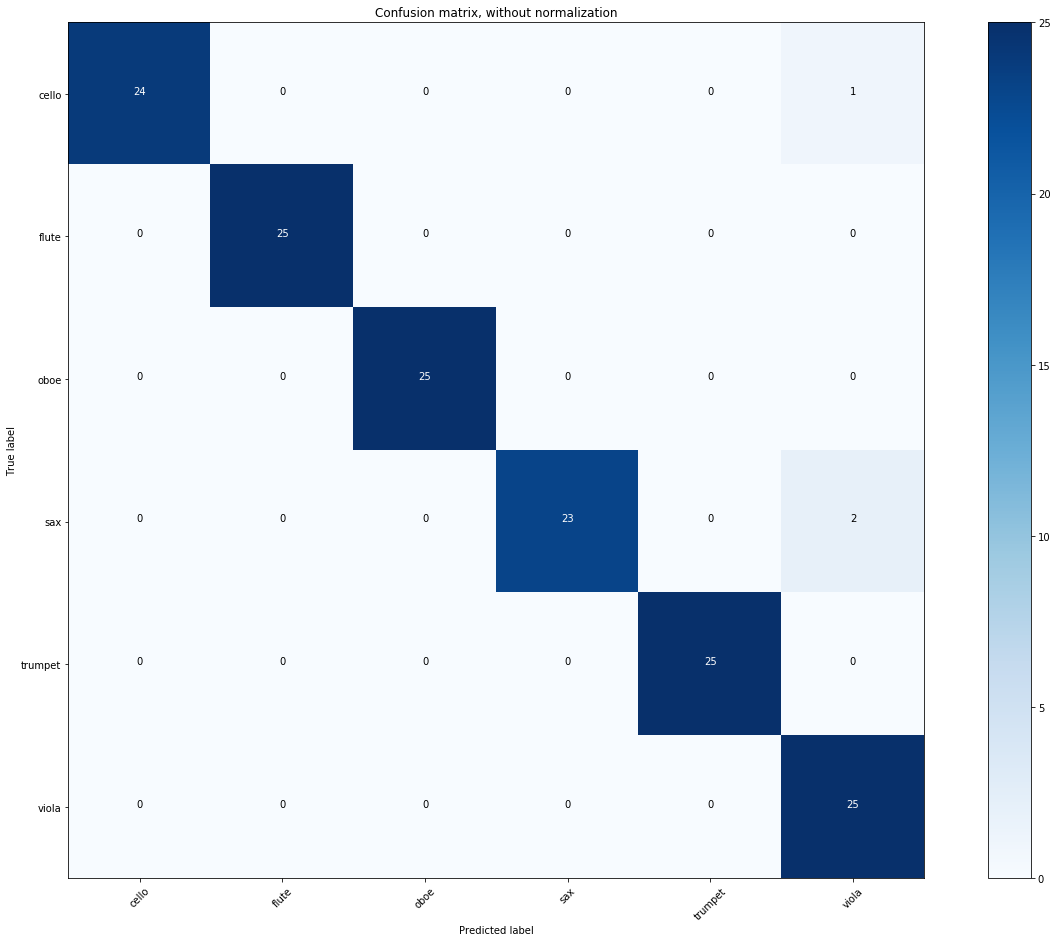

In [23]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [24]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [25]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['cello' 'sax' 'sax']
[5 5 5]
['viola' 'viola' 'viola']
['./audio/london_phill_dataset_multi/cello/cello_A4_05_pianissimo_arco-normal.mp3'
 './audio/london_phill_dataset_multi/sax/saxophone_Gs3_05_pianissimo_normal.mp3'
 './audio/london_phill_dataset_multi/sax/saxophone_Ds4_05_pianissimo_subtone.mp3']
